In [0]:
!mkdir imagenes
!mv urls.txt imagenes/

mkdir: cannot create directory ‘imagenes’: File exists


In [0]:
from download import download
download("imagenes")

1 clases encontradas: urls.
Urls validos: 556
Imagenes a bajar: 47
Imagenes bajadas: 10
Total imagenes: 485



In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import random

imageDir = 'imagenes/urls/'

valid_image_extensions = [".jpg",".jpeg"]
valid_image_extensions = [item.lower() for item in valid_image_extensions]

file_list = os.listdir(imageDir)
print("Hay {} imagenes em el dataset".format(len(file_list)))

Hay 485 imagenes em el dataset


In [0]:
image_set = []

for file in file_list:
  extension = os.path.splitext(file)[1]
  if extension.lower() in valid_image_extensions:
    img = cv2.imread(os.path.join(imageDir, file))
    if img is not None:
      image_set.append(os.path.join(imageDir, file))

print("Hay {} imagenes filtradas".format(len(image_set)))

Hay 473 imagenes filtradas


In [0]:
def histogram(img):
  rows, cols = img.shape
  H = np.zeros((256), dtype=np.float32)
  for i in range(rows):
    for j in range(cols):
      H[img[i,j]] += 1
  H = H / (rows*cols)
  return H

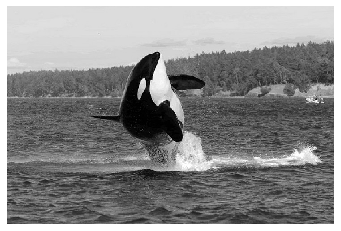

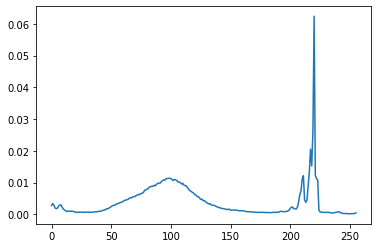

In [0]:
img = cv2.imread(image_set[0], 0)
h = histogram(img)

plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

plt.plot(h)
plt.show()

In [0]:
dict = {}
W = 200

for imageName in image_set:
  img = cv2.imread(imageName, 0)
  if img is not None:
    scale = W/img.shape[1]
    newImg = cv2.resize(img, (int(img.shape[0]*scale), int(img.shape[1]*scale)))
    hist = histogram(newImg)
    dict[imageName] = hist

In [0]:
W = 200

queryName = random.choice(file_list)

queryImage = cv2.imread(os.path.join(imageDir, queryName), 0)
if queryImage is not None:
  scale = W/queryImage.shape[0]
  qImage = cv2.resize(queryImage, (int(queryImage.shape[0]*scale), int(queryImage.shape[1]*scale)))
  queryHist = histogram(qImage)

distances = []
names = []
for imageName in image_set:
  dist = np.linalg.norm(queryHist - dict[imageName])
  distances.append(dist)
  names.append(imageName)

index = np.argsort(distances)


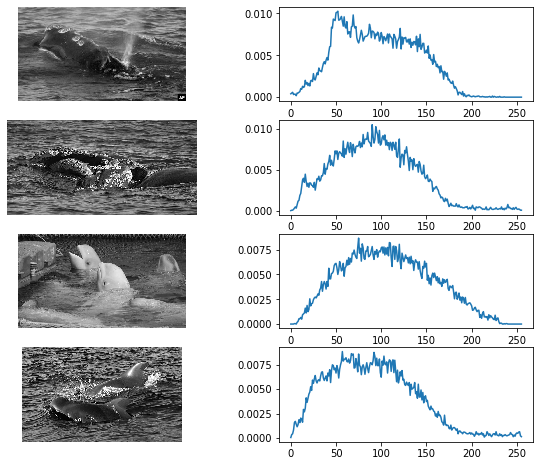

In [0]:
plt.figure(figsize=(10,8))

for i in range(4):
  
  plt.subplot(4, 2, (i+1)*2-1)
  plt.axis("off")
  img = cv2.imread(image_set[index[i]], 0)
  plt.imshow(img, cmap="gray")
  
  plt.subplot(4, 2, (i+1)*2)
  plt.plot(dict[names[index[i]]])

plt.show()

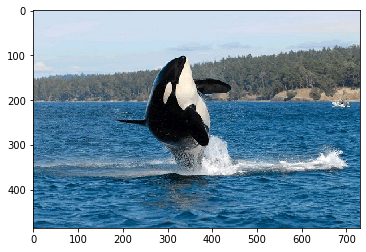

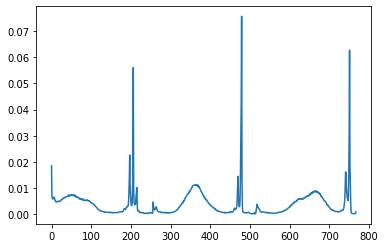

In [0]:

def HistogramRGB(img):
  r = histogram(np.array([[j[0] for j in i] for i in img]))
  g = histogram(np.array([[j[1] for j in i] for i in img]))
  b = histogram(np.array([[j[2] for j in i] for i in img]))
  return np.concatenate((r,g,b))

img = cv2.imread(image_set[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

hist = HistogramRGB(img)

plt.plot(hist)
plt.show()


In [0]:
dict = {}
W = 200

for imageName in image_set:
  img = cv2.imread(imageName)
  if img is not None:
    scale = W/img.shape[1]
    newImg = cv2.resize(img, (int(img.shape[0]*scale), int(img.shape[1]*scale)))
    newImg = cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB)
    hist = HistogramRGB(newImg)
    dict[imageName] = hist

In [0]:
W = 200

queryName = random.choice(file_list)

queryImage = cv2.imread(os.path.join(imageDir, queryName))
queryImage = cv2.cvtColor(queryImage, cv2.COLOR_BGR2RGB)
if queryImage is not None:
  scale = W/queryImage.shape[0]
  qImage = cv2.resize(queryImage, (int(queryImage.shape[0]*scale), int(queryImage.shape[1]*scale)))
  queryHist = HistogramRGB(qImage)

distances = []
names = []
for imageName in image_set:
  dist = np.linalg.norm(queryHist - dict[imageName])
  distances.append(dist)
  names.append(imageName)

index = np.argsort(distances)


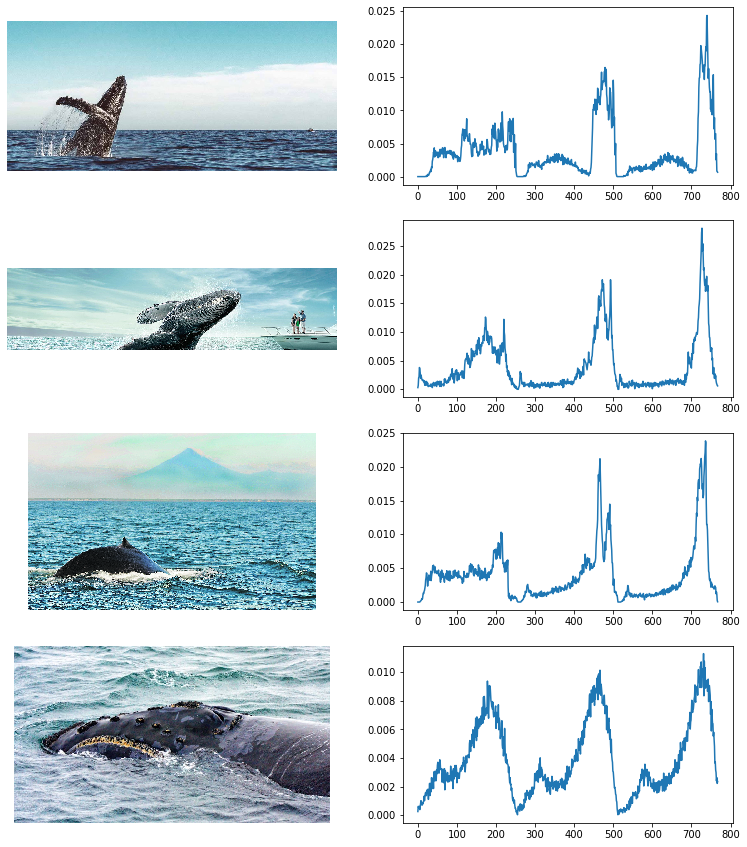

In [0]:
plt.figure(figsize=(13,15))

for i in range(4):
  
  plt.subplot(4, 2, (i+1)*2-1)
  plt.axis("off")
  img = cv2.imread(image_set[index[i]])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  
  plt.subplot(4, 2, (i+1)*2)
  plt.plot(dict[names[index[i]]])

plt.show()